In [9]:
import glob
import os

import cv2
from PIL import Image
import numpy as np

In [3]:
jpg_pat = 'seiga-thumb/*.jpg'

In [4]:
files = glob.glob(jpg_pat)

In [7]:
# ! wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

In [6]:
cascade = cv2.CascadeClassifier("lbpcascade_animeface.xml")

In [12]:
def detect(fname):
    image = cv2.imread(fname, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)# , minsize=(24, 24))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    rgb_cv = image[:, :, ::-1].copy()
    img = Image.fromarray(rgb_cv)
    return img

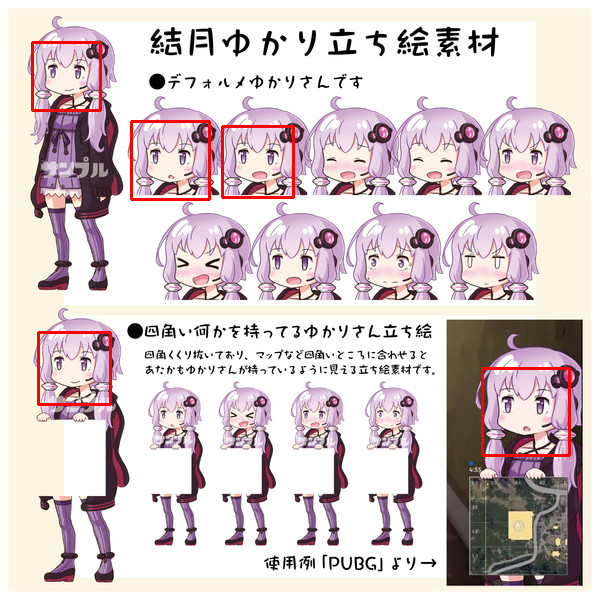

In [13]:
img = detect(files[0])
img